

## Project: Effective Quantitative Calculation of Energy Consumption of Residential Buildings Using Statistical Machine Learning Methods

###   Viral Patel:     300122990




In [0]:
pip install -U keras

Requirement already up-to-date: keras in c:\users\virpa\anaconda3\lib\site-packages (2.3.1)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import packages and libraries
import numpy as np
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
import numpy
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
#from sklearn.metrics import explained_variance_score
#from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [0]:
#pip install --upgrade tensorflow

In [0]:
# load dataset
dataframe = pandas.read_csv("ENB2012_data.csv")

# Assign names to Columns
dataframe.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [3]:
print("Head:", dataframe.head())

Head:    relative_compactness  surface_area  ...  heating_load  cooling_load
0                  0.98         514.5  ...         15.55         21.33
1                  0.98         514.5  ...         15.55         21.33
2                  0.98         514.5  ...         15.55         21.33
3                  0.98         514.5  ...         15.55         21.33
4                  0.90         563.5  ...         20.84         28.28

[5 rows x 10 columns]


In [4]:
print("Statistical Description:", dataframe.describe())


Statistical Description:        relative_compactness  surface_area  ...  heating_load  cooling_load
count            768.000000    768.000000  ...    768.000000    768.000000
mean               0.764167    671.708333  ...     22.307201     24.587760
std                0.105777     88.086116  ...     10.090196      9.513306
min                0.620000    514.500000  ...      6.010000     10.900000
25%                0.682500    606.375000  ...     12.992500     15.620000
50%                0.750000    673.750000  ...     18.950000     22.080000
75%                0.830000    741.125000  ...     31.667500     33.132500
max                0.980000    808.500000  ...     43.100000     48.030000

[8 rows x 10 columns]


In [5]:

print("Shape:", dataframe.shape)


Shape: (768, 10)


In [6]:

print("Data Types:", dataframe.dtypes)


Data Types: relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                    int64
glazing_area                 float64
glazing_area_distribution      int64
heating_load                 float64
cooling_load                 float64
dtype: object


In [7]:

print("Correlation:", dataframe.corr(method='pearson'))

Correlation:                            relative_compactness  ...  cooling_load
relative_compactness               1.000000e+00  ...      0.634339
surface_area                      -9.919015e-01  ...     -0.672999
wall_area                         -2.037817e-01  ...      0.427117
roof_area                         -8.688234e-01  ...     -0.862547
overall_height                     8.277473e-01  ...      0.895785
orientation                        0.000000e+00  ...      0.014290
glazing_area                       1.283986e-17  ...      0.207505
glazing_area_distribution          1.764620e-17  ...      0.050525
heating_load                       6.222722e-01  ...      0.975862
cooling_load                       6.343391e-01  ...      1.000000

[10 rows x 10 columns]


In [8]:
print("Correlation:", dataframe.corr(method='spearman'))

Correlation:                            relative_compactness  ...  cooling_load
relative_compactness                   1.000000  ...      0.651019
surface_area                          -1.000000  ...     -0.651019
wall_area                             -0.255805  ...      0.415991
roof_area                             -0.870886  ...     -0.803175
overall_height                         0.869048  ...      0.864876
orientation                            0.000000  ...      0.017606
glazing_area                           0.000000  ...      0.288904
glazing_area_distribution              0.000000  ...      0.046477
heating_load                           0.622135  ...      0.972689
cooling_load                           0.651019  ...      1.000000

[10 rows x 10 columns]


'overall_height' has the highest correlation with 'heating_load' and 'cooling_load' (which is a positive correlation), followed by 'roof_area' for both outputs
 which is a negative correlation, 'orientation' has the least correlation 

In [0]:
dataset = dataframe.values


X = dataset[:,0:8]
Y = dataset[:,8]
Y2 = dataset[:,9]

In [10]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False  True False  True  True False False False]
Feature Ranking:  [4 1 3 1 1 6 2 5]


'wall_area', 'roof_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'heating_load'
 using Recursive Feature Elimination, the 2nd and 3rd selected features were atually among the attributes with the highest correlation with the  'heating_load'

In [11]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y2)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 


Number of Features:  3
Selected Features:  [ True False  True False  True False False False]
Feature Ranking:  [1 3 1 6 1 5 2 4]


'wall_area', 'glazing_area' and 'overall_height' were top 3 selected features/feature combination for predicting 'cooling_load'
using Recursive Feature Elimination

(array([ 20., 187., 153.,  39.,  39.,  59.,  83.,  83.,  59.,  46.]),
 array([ 6.01 ,  9.719, 13.428, 17.137, 20.846, 24.555, 28.264, 31.973,
        35.682, 39.391, 43.1  ]),
 <a list of 10 Patch objects>)

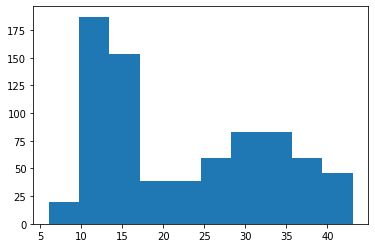

In [12]:
plt.hist((dataframe.heating_load))


(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

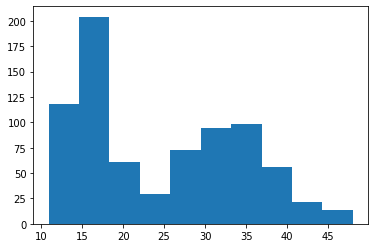

In [13]:
plt.hist((dataframe.cooling_load))

(array([118., 204.,  61.,  29.,  73.,  94.,  98.,  56.,  21.,  14.]),
 array([10.9  , 14.613, 18.326, 22.039, 25.752, 29.465, 33.178, 36.891,
        40.604, 44.317, 48.03 ]),
 <a list of 10 Patch objects>)

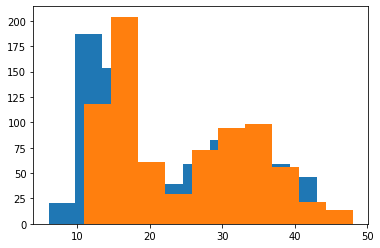

In [14]:
plt.hist((dataframe.heating_load))

plt.hist((dataframe.cooling_load))


Most of the dataset's samples fall between 10 and 20 of both 'heating_load' and 'cooling_load' regressional output classes, with a positive skew

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa174a0550>,
      dtype=object)

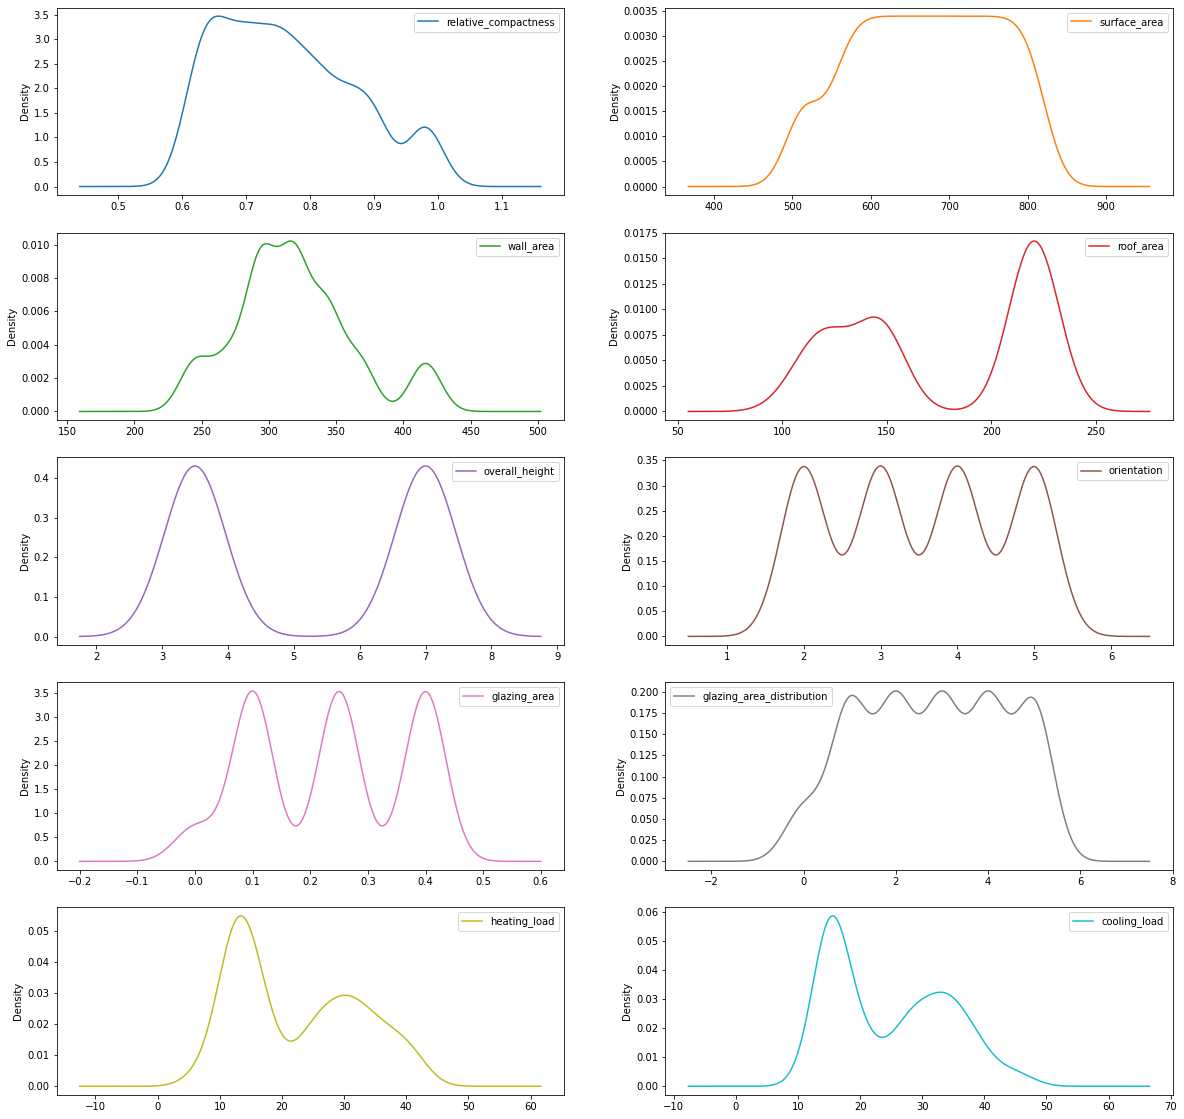

In [15]:
dataframe.plot(figsize=(20,20),kind='density', subplots=True, layout=(5,2), sharex=False, sharey=False)

Majority of the features have a positive skew except for a few, 'oreintation' and 'overall_height' have quite even distribution

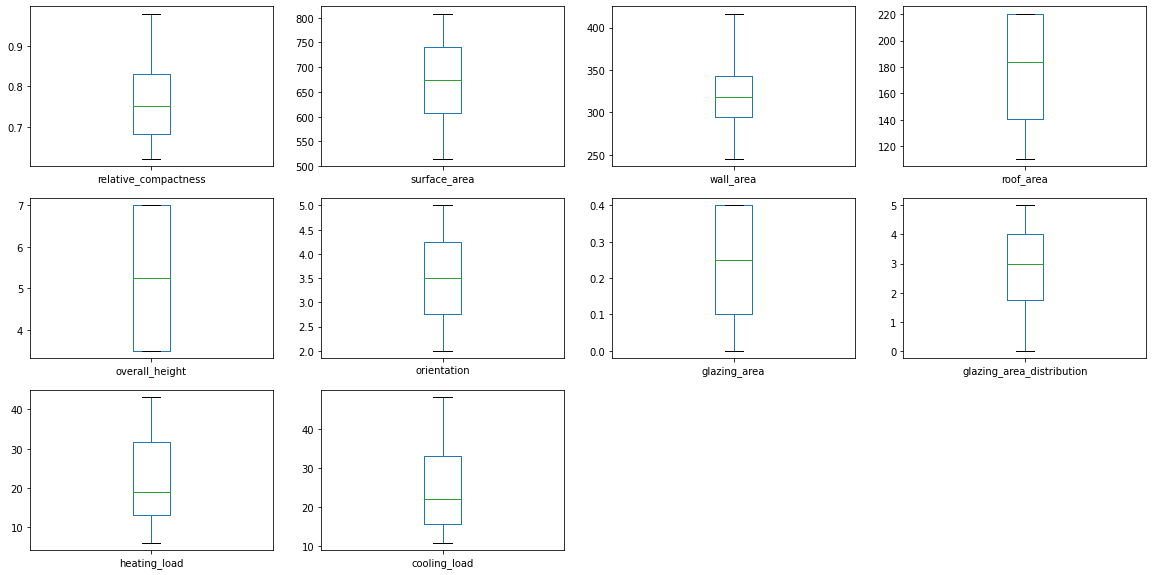

In [16]:
axes = dataframe.plot(figsize=(20,10),kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa155a8208>,
      dtype=object)

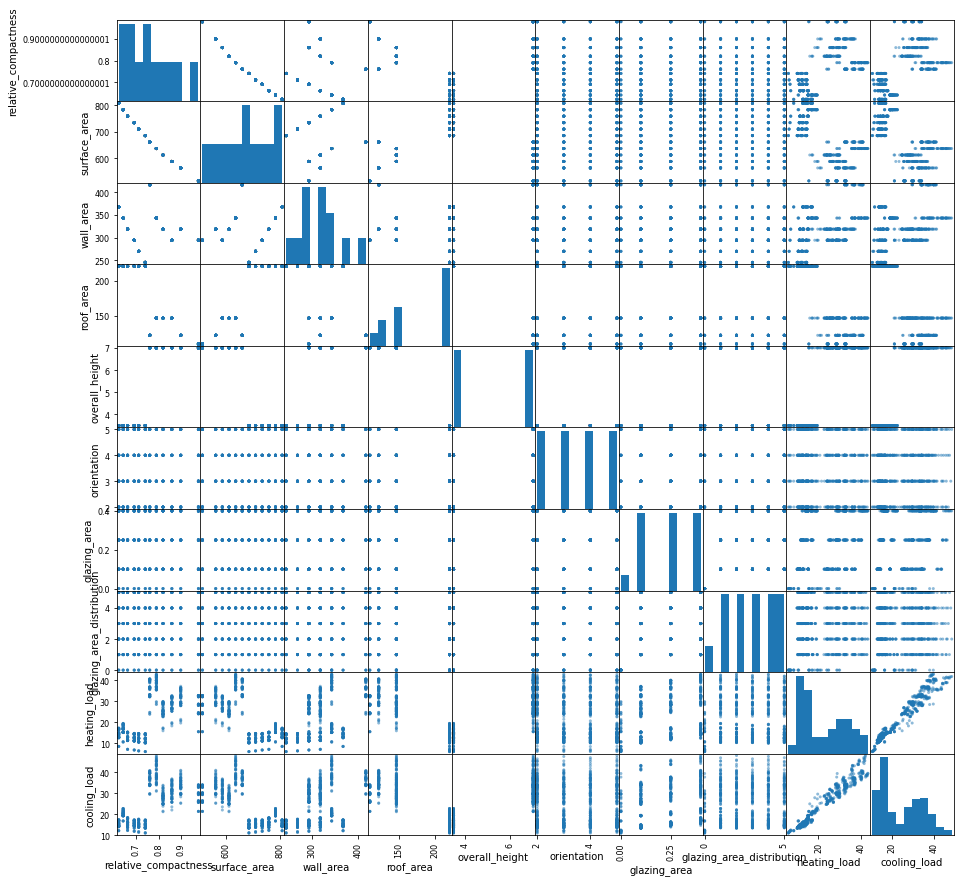

In [17]:
scatter_matrix(dataframe,figsize  = [15, 15],)

[Text(0, 0, 'relative_compactness'),
 Text(0, 0, 'surface_area'),
 Text(0, 0, 'wall_area'),
 Text(0, 0, 'roof_area'),
 Text(0, 0, 'overall_height'),
 Text(0, 0, 'orientation'),
 Text(0, 0, 'glazing_area'),
 Text(0, 0, 'glazing_area_distribution'),
 Text(0, 0, 'heating_load')]

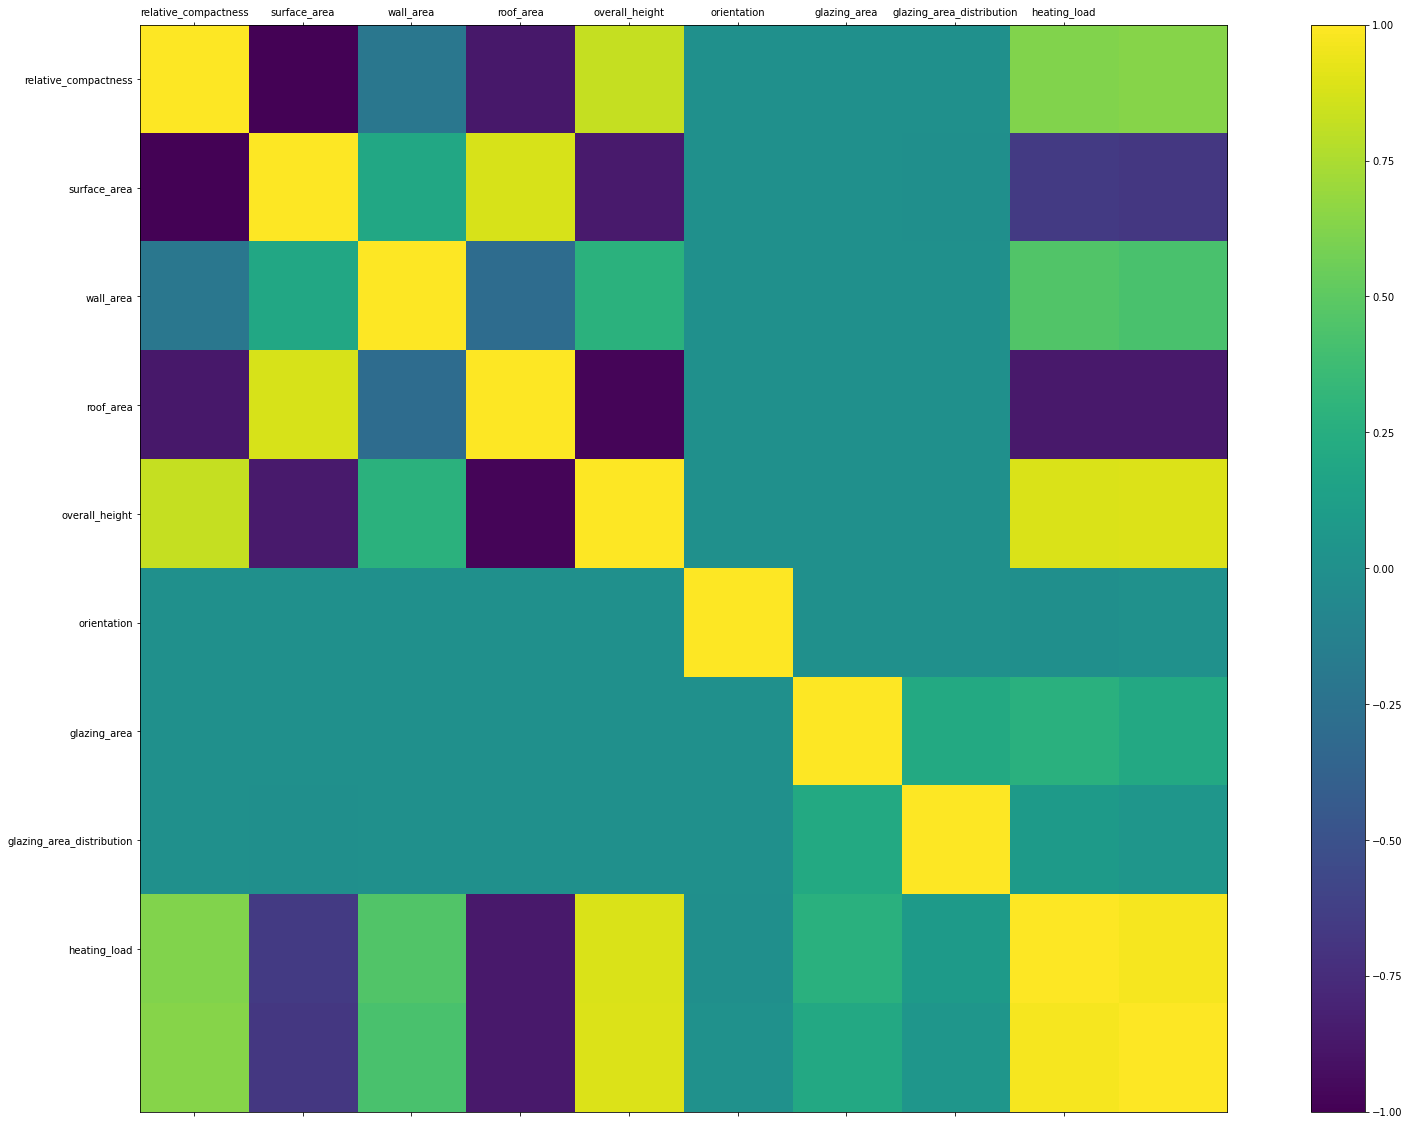

In [18]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

In [19]:
#dataframe.corr()
dataframe.corr(method='spearman')

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.000000,-1.000000,-0.255805,-0.870886,0.869048,0.000000,0.000000,0.000000,0.622135,0.651019
surface_area,-1.000000,1.000000,0.255805,0.870886,-0.869048,0.000000,0.000000,0.000000,-0.622135,-0.651019
wall_area,-0.255805,0.255805,1.000000,-0.193457,0.220763,0.000000,0.000000,0.000000,0.471458,0.415991
roof_area,-0.870886,0.870886,-0.193457,1.000000,-0.937043,0.000000,0.000000,0.000000,-0.804027,-0.803175
overall_height,0.869048,-0.869048,0.220763,-0.937043,1.000000,0.000000,0.000000,0.000000,0.861283,0.864876
orientation,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.004163,0.017606
glazing_area,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.187592,0.322860,0.288904
glazing_area_distribution,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187592,1.000000,0.068343,0.046477
heating_load,0.622135,-0.622135,0.471458,-0.804027,0.861283,-0.004163,0.322860,0.068343,1.000000,0.972689
cooling_load,0.651019,-0.651019,0.415991,-0.803175,0.864876,0.017606,0.288904,0.046477,0.972689,1.000000


'overall_height' has the highest positive corelation as expected

In [20]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    predictions = model.predict(X)
    # Evaluate the model
    kfold = model_selection.KFold(n_splits=10 ) #random_state=seed
    cv_results = model_selection.cross_val_score(model, X, Y, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LiR: 0.894240 (0.065180)
Ridge: 0.888898 (0.073554)
Lasso: 0.739750 (0.185156)
ElasticNet: 0.751113 (0.184069)
Bag_Re: 0.969167 (0.082450)
RandomForest: 0.969185 (0.082574)
ExtraTreesRegressor: 0.969104 (0.082352)
KNN: 0.885004 (0.194983)
CART: 0.968717 (0.082255)
SVM: 0.683841 (0.133142)


[Text(0, 0, 'LiR'),
 Text(0, 0, 'Ridge'),
 Text(0, 0, 'Lasso'),
 Text(0, 0, 'ElasticNet'),
 Text(0, 0, 'Bag_Re'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTreesRegressor'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'SVM')]

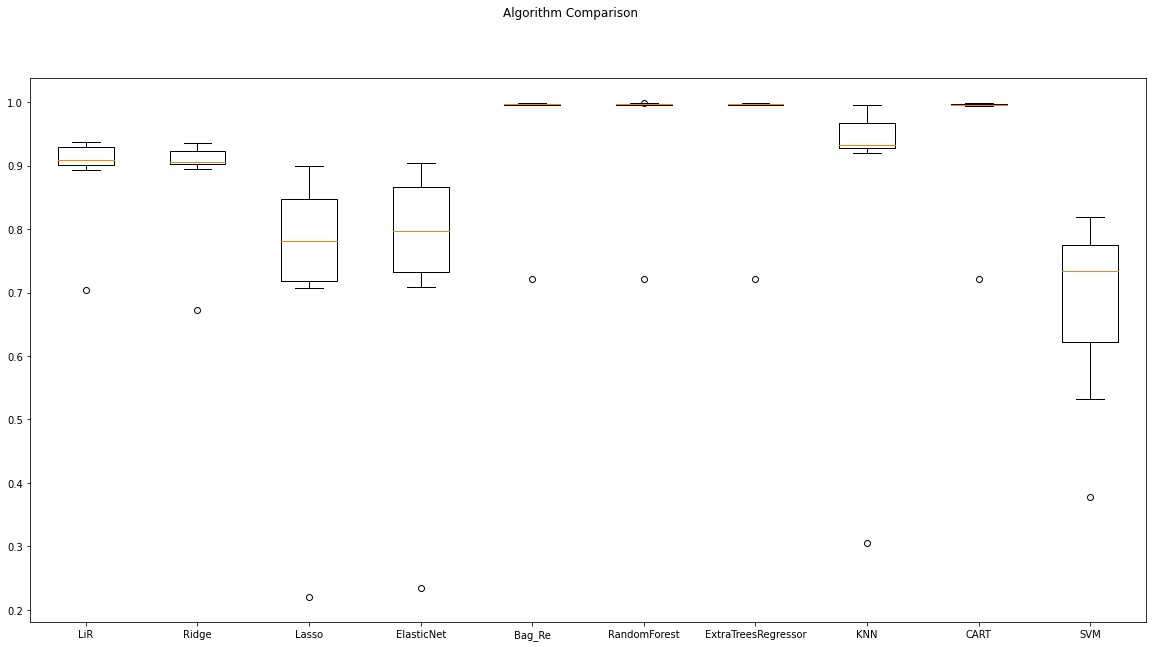

In [21]:
#boxplot algorithm Comparison
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

'ExtraTrees Regressor' and 'Random Forest' are the best estimators/models for 'heating_load'
 

In [22]:
# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y2)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    kfold = model_selection.KFold(n_splits=10) #random_state=seed
    cv_results = model_selection.cross_val_score(model, X, Y2, cv=10)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    


LiR: 0.876674 (0.032395)
Ridge: 0.870432 (0.036123)
Lasso: 0.751754 (0.101792)
ElasticNet: 0.762353 (0.098235)
Bag_Re: 0.962673 (0.025359)
RandomForest: 0.964445 (0.023486)
ExtraTreesRegressor: 0.950768 (0.021915)
KNN: 0.924107 (0.088863)
CART: 0.954942 (0.020943)
SVM: 0.703267 (0.079129)


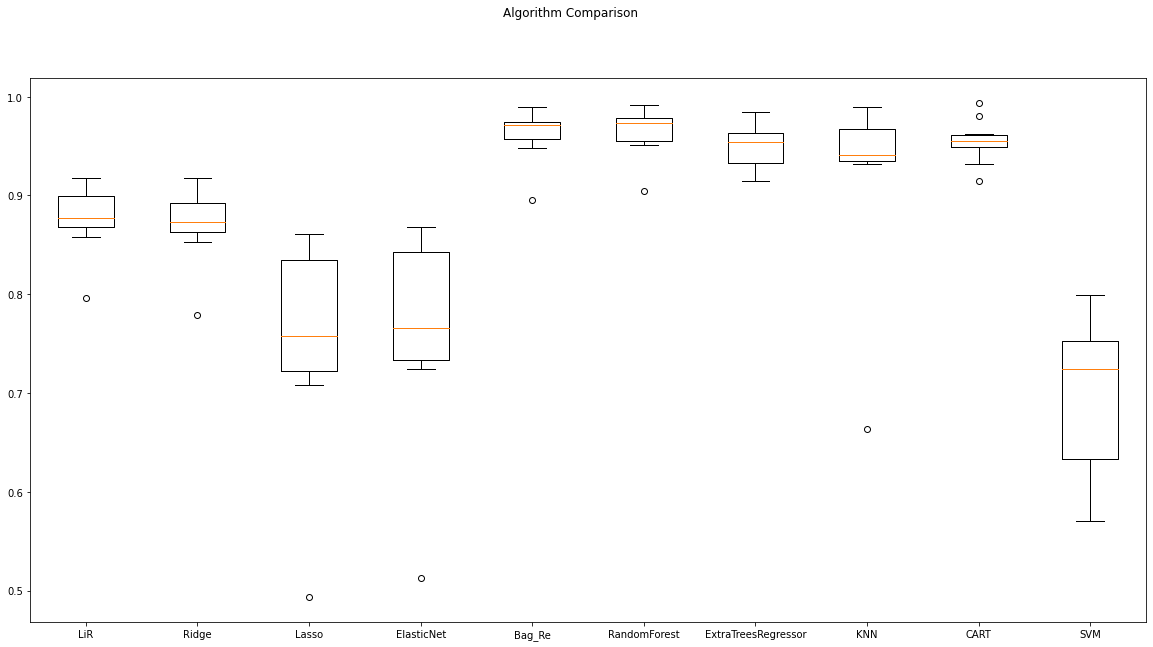

In [23]:
#boxplot algorithm Comparison
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


And 'Random Forest' and 'Bagging Regressor' are the best estimators/models for 'cooling_load', they can be further explored and their hyperparameters tuned

In [24]:
# Define 10-fold Cross Valdation Test Harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
y=np.zeros(len(X))
for train, test in (kfold.split(X,y)):

    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='relu'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, input_dim=8, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_constraint=<keras.con..., kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()


score: 91.14%
score: 77.51%
score: 90.79%
score: 91.18%
score: 90.79%
90.79% (+/- 0.00%)


In [25]:
# Define 10-fold Cross Valdation Test Harness
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, y):

    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, init='uniform', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(8, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    model.add(Dense(5, init='uniform', activation='relu'))
    model.add(Dense(1, init='uniform', activation='relu'))

    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='sgd')

    # Fit the model
    model.fit(X[train], Y2[train], epochs=300, batch_size=10, verbose=0)

    # Evaluate the model
    scores = model.evaluate(X[test], Y2[test], verbose=0)
    print("%s: %.2f%%" % ("score", 100-scores))
cvscores.append(100-scores)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, input_dim=8, activation="relu", kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


score: 91.39%
score: 91.44%
score: 74.81%
74.81% (+/- 0.00%)
